In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m=40 #Número de máquinas
n=60 #Número de procesos.

N=200 #Tamaño de la población

#Parámetros del algoritmo genético.

#procesos: lo que tienen que realizar las máquinas.
procesos=[]
Tmax=0
for i in range(n):
  orden=np.random.permutation(list(range(m)))
  tiempos=np.random.randint(low=1, high=6, size=m)
  Tmax+=np.sum(tiempos)
  procesos.append([(o,t) for o,t in zip(orden, tiempos) if np.random.rand()<0.8])
for i,pr in zip(range(n), procesos):
  print('Usuario: ',i,',Orden de máquinas: ',pr)

posicion={tuple(k):v for k,v in zip(procesos, range(n))}


Usuario:  0 ,Orden de máquinas:  [(35, 4), (34, 4), (33, 4), (18, 3), (36, 5), (38, 5), (29, 1), (17, 2), (11, 3), (28, 3), (12, 3), (5, 2), (3, 5), (10, 3), (15, 4), (22, 1), (24, 4), (21, 5), (0, 2), (20, 4), (39, 5), (6, 2), (16, 5), (23, 1), (13, 2), (19, 1), (7, 2), (27, 2), (2, 2), (4, 2), (30, 1), (26, 1), (8, 2), (1, 5), (32, 3)]
Usuario:  1 ,Orden de máquinas:  [(38, 1), (9, 5), (27, 3), (4, 4), (14, 4), (17, 4), (7, 2), (0, 1), (25, 2), (20, 2), (37, 5), (22, 5), (8, 1), (39, 5), (23, 1), (21, 3), (29, 1), (28, 5), (2, 4), (19, 5), (11, 4), (36, 1), (26, 1), (10, 2), (30, 2), (32, 4), (12, 3), (35, 5), (24, 5), (13, 4), (3, 2), (31, 1), (1, 3), (34, 5), (18, 2)]
Usuario:  2 ,Orden de máquinas:  [(38, 5), (13, 1), (27, 4), (24, 5), (16, 2), (4, 2), (18, 4), (3, 1), (2, 2), (14, 4), (8, 4), (12, 4), (31, 5), (26, 3), (10, 3), (29, 3), (34, 1), (28, 4), (36, 1), (20, 4), (7, 3), (19, 2), (23, 4), (32, 2), (39, 1), (37, 2), (5, 5)]
Usuario:  3 ,Orden de máquinas:  [(11, 5), (10, 

In [ ]:
#Planificador de prioridad:
def planificador(procesos, n, m, metodo='prioridad'):
  procesos_pendientes=[pr.copy() for pr in procesos]
  cnt=np.zeros(n, dtype=int) #Indica que un proceso se encuentra ocupado durante un tiempo

  schedule=np.zeros((Tmax+1,m), dtype=int)-1 #Para almacenar el tiempo de ocurrencia de los procesos
  t=0 #Inicialización del tiempo
  while(np.sum([len(pi) for pi in procesos_pendientes])>0 and t<Tmax):
    cnt-=1
    #Estado actual de máquinas libres u ocupadas.
    estado=schedule[t]
    for j in range(m): #Revisando todas las máquinas.
      if(estado[j]==-1): #La máquina j-esima está libre
        #Se debe verificar por los procesos que lo pueden necesitar
        disponibles=[]
        for i in range(n): #recorrer para analizar todos los procesos.
          if(len(procesos_pendientes[i])>0 and cnt[i]<=0):
            if(procesos_pendientes[i][0][0]==j): #El trabajo que sigue requiere a la máquina j
              disponibles.append(i)
        if(len(disponibles)>0): #Hay algun proceso que requiere esta máquina
          if(metodo=='aleatorio'):
            ind=np.random.choice(a=disponibles) #<3 <------------------- corazon
          if(metodo=='prioridad'):
            ind=min(disponibles) #<3 <------------------- corazon

          maq, dt=procesos_pendientes[ind].pop(0)
          #print('En el tiempo ',t,'El usuario ',ind,' se ubicará en la máquina',maq,j,' durante un tiempo ',dt)
          cnt[ind]=dt
          for ti in range(t, t+dt):
            schedule[ti, j]=ind
    #print(schedule[0:10,:])
    t+=1
  t+=5
  final=0
  for t in range(Tmax):
    if(np.sum(schedule[t])==-m):
      final=t-1
      break
  schedule=schedule[0:final+1,:]
  return schedule,final

In [ ]:
class ser:
  def __init__(self, n, m, procesos, aleatorizar=True): #Vamos a crear una solución en el arranque que sea aleatoria
    if(aleatorizar):
      pos=np.random.permutation(range(len(procesos)))
    else:
      pos=list(range(n))
    self.procesos=[procesos[i].copy() for i in pos]
    self.schedule, self.ti=planificador(self.procesos, n, m)

poblacion=[ser(n, m, procesos) for i in range(N)]
ti=[pob.ti for pob in poblacion]
#Acá contamos con la población inicial de soluciones


In [ ]:
def prunning(poblacion, n_remover): #n_remover significa, cuántos se eliminan
  #Vamos a calcular las probabilidades:
  ti=[pob.ti for pob in poblacion]
  pr=[t-min(ti) for t in ti]
  K=np.sum(pr)
  pr=[pi/K for pi in pr]
  elegidos=np.random.choice(a=range(len(poblacion)), p=pr, size=n_remover, replace=False)
  poblacion2=[pob for pob, ind in zip(poblacion, range(len(poblacion))) if ind not in elegidos]
  return poblacion2

#poblacion2=prunning(poblacion, 10)

In [ ]:
def mutacion(poblacion, n_mutar): #n_remover significa, cuántos se eliminan
  elegidos=np.random.choice(a=range(len(poblacion)), size=n_mutar)
  for i in elegidos:
    a,b=np.random.choice(a=range(n), size=2)
    tmp=poblacion[i].procesos[a]
    poblacion[i].procesos[a]=poblacion[i].procesos[b]
    poblacion[i].procesos[b]=tmp
  return poblacion

#poblacion2=mutacion(poblacion, 10)

In [ ]:
def cross_over(poblacion, n_cruces): #n_remover significa, cuántos se eliminan
  ti=[pob.ti for pob in poblacion]
  pr=[max(ti)-t for t in ti]
  K=np.sum(pr)
  pr=[pi/K for pi in pr]
  elegidos=np.random.choice(a=range(len(poblacion)), p=pr, size=(n_cruces,2))
  for i,j in elegidos: #i y j son los índices de las poblaciones a mezclar.
    procesos1=[poblacion[i].procesos[k].copy() for k in range(n)]
    procesos2=[poblacion[j].procesos[k].copy() for k in range(n)]
    L1=int(len(procesos1)/2)
    L=len(procesos1)
    proceso3=procesos1[0:L1]+procesos2[L1:L]
    orden=[procesos.copy() for procesos in proceso3]
    #print(n,m,orden)
    poblacion.append(ser(n, m, orden, aleatorizar=False))
  return poblacion

#poblacion2=cross_over(poblacion, 10)
#len(poblacion2)


In [ ]:
tmin=100000
iter,sol=[],[]
from tqdm import tqdm
for i in tqdm(range(1000)):
  poblacion=prunning(poblacion, 20)
  poblacion=mutacion(poblacion, 20)
  poblacion=cross_over(poblacion, 20)
  ti=[pob.ti for pob in poblacion]
  iter.append(i)
  sol.append(tmin)
  if(min(ti)<tmin):
    tmin=min(ti)
    print('Iteracion: ',i,', mejor fitness: ',tmin)

  0%|          | 1/1000 [00:02<40:54,  2.46s/it]

Iteracion:  0 , mejor fitness:  253


  0%|          | 3/1000 [00:07<40:07,  2.41s/it]

Iteracion:  2 , mejor fitness:  252


  2%|▏         | 20/1000 [00:53<44:26,  2.72s/it]

Iteracion:  19 , mejor fitness:  249


  3%|▎         | 26/1000 [01:10<47:58,  2.96s/it]

Iteracion:  25 , mejor fitness:  248


  3%|▎         | 33/1000 [01:28<43:49,  2.72s/it]

Iteracion:  32 , mejor fitness:  246


  5%|▍         | 47/1000 [02:04<43:01,  2.71s/it]

Iteracion:  46 , mejor fitness:  245


  5%|▍         | 48/1000 [02:07<44:29,  2.80s/it]

Iteracion:  47 , mejor fitness:  244


  8%|▊         | 85/1000 [03:34<34:00,  2.23s/it]

Iteracion:  84 , mejor fitness:  243


 10%|▉         | 98/1000 [04:07<40:16,  2.68s/it]

Iteracion:  97 , mejor fitness:  238


 12%|█▏        | 117/1000 [04:51<32:55,  2.24s/it]

Iteracion:  116 , mejor fitness:  229


 41%|████▏     | 414/1000 [16:19<25:15,  2.59s/it]

Iteracion:  413 , mejor fitness:  228


 47%|████▋     | 467/1000 [18:18<19:48,  2.23s/it]

Iteracion:  466 , mejor fitness:  225


 71%|███████   | 709/1000 [27:25<11:02,  2.28s/it]

Iteracion:  708 , mejor fitness:  224


 71%|███████   | 712/1000 [27:31<10:05,  2.10s/it]

Iteracion:  711 , mejor fitness:  223


 90%|█████████ | 901/1000 [34:33<04:01,  2.44s/it]

Iteracion:  900 , mejor fitness:  222


100%|██████████| 1000/1000 [38:12<00:00,  2.29s/it]


Text(0, 0.5, 'Mejor fitness')

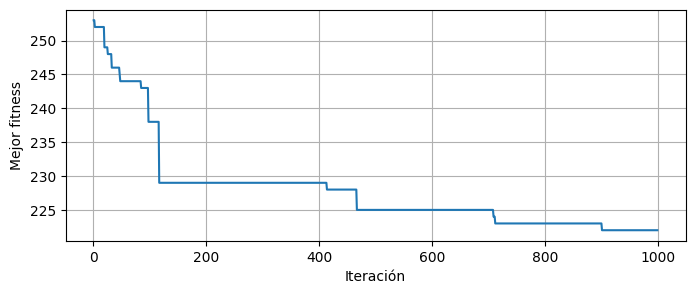

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(iter[1:],sol[1:])
plt.grid()
plt.xlabel('Iteración')
plt.ylabel('Mejor fitness')

In [ ]:
ind=np.argmin(ti)

Text(0.5, 14.722222222222216, 'Tiempo')

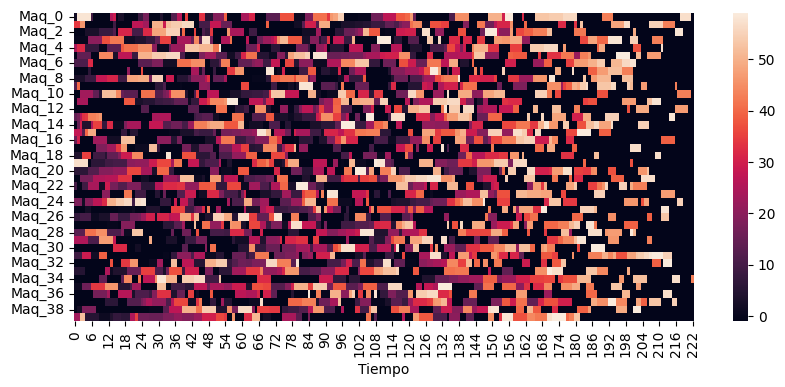

In [ ]:
import pandas as pd
import seaborn as sns
schedule=poblacion[ind].schedule

df=pd.DataFrame(data=schedule, index=[i for i in range(len(schedule))], columns=['Maq_'+str(i) for i in range(m)])
plt.figure(figsize=(10,4))
sns.heatmap(df.T, annot=False, annot_kws={"fontsize":6})
plt.xlabel('Tiempo')